In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
 #Cargar y preparar los datos
df = pd.read_csv('datos_clima/climadag_extraccion_clima_datos_clima.csv')

In [3]:
# convertir la columna precipitacion a binario. 
# Definir el umbral 
umbral = 0

# Transformar la columna de precipitación a binario
df['precipitacion_binaria'] = df['precipitacion_total'].apply(lambda x: 1 if x > umbral else 0)

# Verificar la transformación
print(df[['precipitacion_total', 'precipitacion_binaria']].head())


   precipitacion_total  precipitacion_binaria
0                 1.25                      1
1                12.86                      1
2                20.81                      1
3                 0.00                      0
4                 0.00                      0


In [4]:
# Seleccionar las características y el objetivo
features = ['temp_min', 'temp_max', 'temp_tarde', 'temp_noche', 'temp_vespertina', 'temp_manana', 
            'humedad_tarde', 'presion_tarde', 'vel_viento_max', 'dir_viento_max', 
            'nubosidad_tarde']
target = 'precipitacion_total'

X = df[features]
y = df[target]

# Crear la variable binaria para clasificación (lloverá o no)
y_binary = (y > 0).astype(int)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)
_, _, y_train_regression, y_test_regression = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Entrenar el modelo de clasificación binaria
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_binary = classifier.predict(X_test)

# Evaluar el modelo de clasificación
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7782152230971129
Precision: 0.8020477815699659
Recall: 0.6791907514450867
F1 Score: 0.7355242566510172


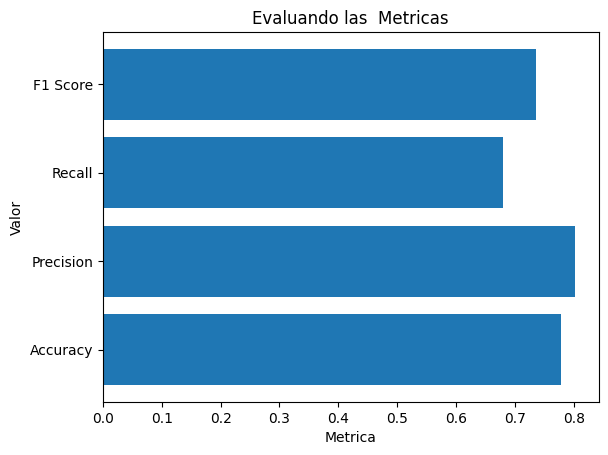

In [6]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.barh(metrics, values)
plt.xlabel('Metrica')
plt.ylabel('Valor')
plt.title('Evaluando las  Metricas')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo de clasificación
classifier = RandomForestClassifier(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train_binary)

# Imprimir los mejores parámetros y resultados
print(f'Mejor Parámetros: {grid_search.best_params_}')
print(f'Mejor F1 Score: {grid_search.best_score_}')


Mejor Parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor F1 Score: 0.7536016902901326


In [8]:
# Definir el modelo de clasificación con los mejores parámetros
best_classifier = RandomForestClassifier(
    max_depth= None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Entrenar el modelo
best_classifier.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_binary_best = best_classifier.predict(X_test)

# Evaluar el modelo de clasificación
accuracy_best = accuracy_score(y_test_binary, y_pred_binary_best)
precision_best = precision_score(y_test_binary, y_pred_binary_best)
recall_best = recall_score(y_test_binary, y_pred_binary_best)
f1_best = f1_score(y_test_binary, y_pred_binary_best)

print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')


Accuracy: 0.7808398950131233
Precision: 0.8118466898954704
Recall: 0.6734104046242775
F1 Score: 0.7361769352290679


MODELO DE REGRESION CON HIPERPARAMETROS Y MEJORANDOLO. 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de regresión
regressor = RandomForestRegressor(random_state=42)

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_binary)

# Imprimir los mejores parámetros y resultados
print(f'Mejor Parámetros: {grid_search.best_params_}')
print(f'Mejor Mean Squared Error: {-grid_search.best_score_}')


Mejor Parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mejor Mean Squared Error: 0.1434966898265992


In [10]:
# Filtrar los días en que se predice que lloverá
predecir_dias_lluvia = y_pred_binary_best == 1
X_train_rain_best = X_train[y_train_binary == 1]
y_train_rain_best = y_train_regression[y_train_binary == 1]
X_test_rain_best = X_test[predecir_dias_lluvia]
y_test_rain_best = y_test_regression[predecir_dias_lluvia]

# Definir el modelo de regresión con los mejores parámetros
best_regressor = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Entrenar el modelo de regresión
best_regressor.fit(X_train_rain_best, y_train_rain_best)

# Hacer predicciones de cantidad de precipitación
y_pred_rain_best = best_regressor.predict(X_test_rain_best)

# Evaluar el modelo de regresión
mse_best = mean_squared_error(y_test_rain_best, y_pred_rain_best)
r2_best = r2_score(y_test_rain_best, y_pred_rain_best)

print(f'Mean Squared Error: {mse_best}')
print(f'R^2 Score: {r2_best}')


Mean Squared Error: 103.76661137384562
R^2 Score: 0.18460563929270923


Graficos del modelo clasificacion



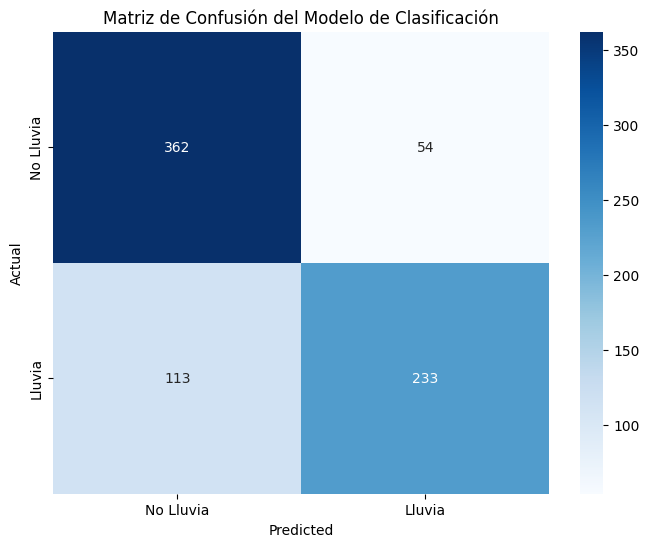

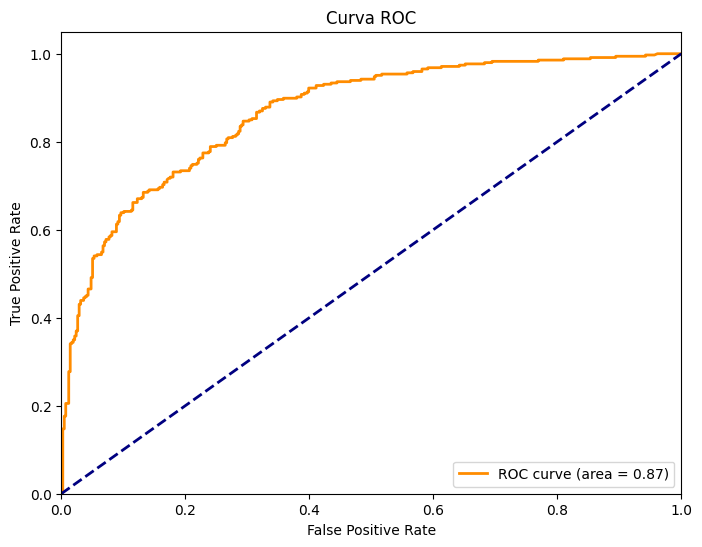

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lluvia', 'Lluvia'], yticklabels=['No Lluvia', 'Lluvia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Modelo de Clasificación')
plt.show()

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, best_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Graficos de regresion

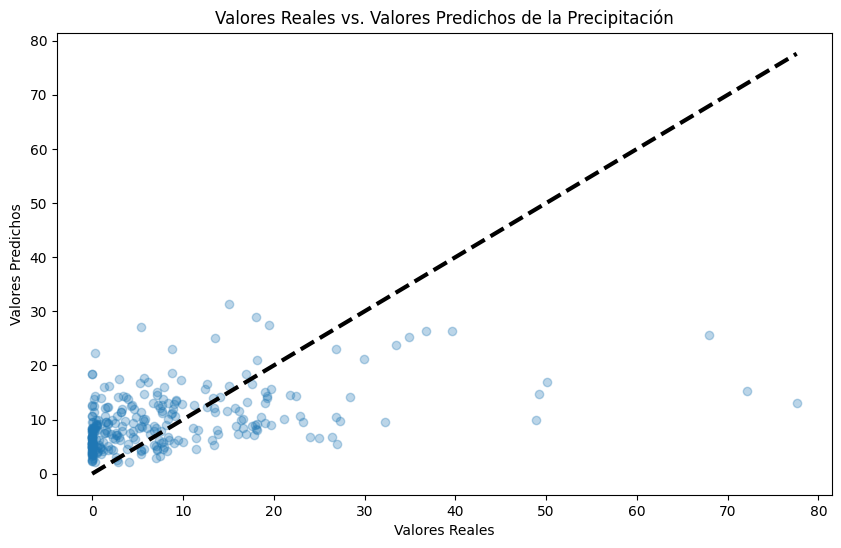

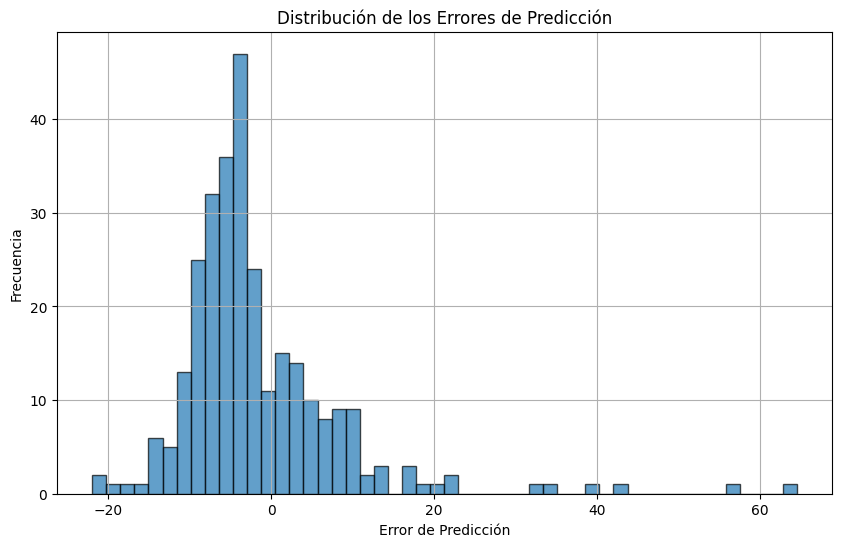

In [12]:
import matplotlib.pyplot as plt

# Valores Reales vs. Valores Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rain_best, y_pred_rain_best, alpha=0.3)
plt.plot([y_test_rain_best.min(), y_test_rain_best.max()], [y_test_rain_best.min(), y_test_rain_best.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos de la Precipitación')
plt.show()

# Distribución de los Errores de Predicción
errors = y_test_rain_best - y_pred_rain_best
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.grid(True)
plt.show()


In [13]:
import joblib

# Guardar el modelo de clasificación
joblib.dump(best_classifier, 'modelo_clasificacion.pkl')


['modelo_clasificacion.pkl']